In [1]:
import torch
import torch.nn
import pandas as pd

First setup the dictionaries to mapp from chars to positions.

In [2]:
characters = list("""ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}""")
print(characters)
print(len(characters))
character_to_integer = dict((c, i) for i, c in enumerate(characters))
integer_to_character = dict((i, c) for i, c in enumerate(characters))
print(character_to_integer)
print(integer_to_character)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ',', ';', '.', '!', '?', ':', "'", '"', '/', '\\', '|', '_', '@', '#', '$', '%', '^', '&', '*', '~', '`', '+', '-', '=', '<', '>', '(', ')', '[', ']', '{', '}']
94
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'a': 26, 'b': 27, 'c': 28, 'd': 29, 'e': 30, 'f': 31, 'g': 32, 'h': 33, 'i': 34, 'j': 35, 'k': 36, 'l': 37, 'm': 38, 'n': 39, 'o': 40, 'p': 41, 'q': 42, 'r': 43, 's': 44, 't': 45, 'u': 46, 'v': 47, 'w': 48, 'x': 49, 'y': 50, 'z': 51, '0': 52, '1': 53, '2': 54, '3': 55, '4': 56, '5': 57, '6': 58, '7'

Let us no look at how a SMILE string gets mapped to indices

In [3]:
test_str = "[2H]C1=C(C(=C(C(=C1NC(=O)C)[2H])[2H])O)[2H]"
integer_encoded = [character_to_integer[char] for char in test_str]
print(integer_encoded)
print(len(integer_encoded))


[90, 54, 7, 91, 2, 53, 85, 2, 88, 2, 88, 85, 2, 88, 2, 88, 85, 2, 53, 13, 2, 88, 85, 14, 89, 2, 89, 90, 54, 7, 91, 89, 90, 54, 7, 91, 89, 14, 89, 90, 54, 7, 91]
43


Let's create a one-hot encoding function

In [4]:
def one_hot_encode(target, character_set_len:int):
    one_hot = list()
    for value in target:
        #first make everything a 0
        L = [0 for _ in range(character_set_len)]
        # now add one at the position of this character
        L[value] = 1
        one_hot.append(L)
    return one_hot


Test one-hot encoding

In [5]:
one_hot=one_hot_encode(integer_encoded,len(characters))
print(one_hot)
print(len(one_hot)) #43 one-hot vectors of size 94
print(len(one_hot[0]))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Create a data set from the smiles data. The data has 1,129,199 rows. The smiles data has string with average size of 56, max size of 1329. But there are 1,061,957 row with size less than 100. So, we will use that becuase it is 94% of the data.

In [7]:
from torch.utils.data import Dataset
class SMILESDataSet(Dataset):
    def __init__(self, smiles_file, train=True, max_str_len = 100, transform=None, target_transform=None):
        super(SMILESDataSet, self).__init__()
        self.smiles_file = smiles_file
        self.max_str_len = max_str_len
        if(train == True):
            self.size = 200000
        else:
            self.size = 50000
        self.transform = transform
        self.target_transform = target_transform
        #character set
        self.characters = list("""ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}""")
        self.character_to_integer = dict((c, i) for i, c in enumerate(characters))
        self.integer_to_character = dict((i, c) for i, c in enumerate(characters))
        
        #open csv
        self.smiles_csv = pd.read_csv(smiles_file)
        #filter out those lines with canonical smiles string longer than 100
        self.smiles_csv = self.smiles_csv[self.smiles_csv.apply(lambda x: len(x['CanonicalSMILES']) <= 100, axis=1)]
        #sample data based on size
        self.smiles_data =  self.smiles_csv.sample(n=self.size).reset_index()
    
    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        #print("Index: ", idx)
        #print("Row: \n", self.smiles_data.iloc[idx])
        X = self.smiles_data.iloc[idx, 3] # Canonical smiles
        #print("X: ", X)
        y = self.smiles_data.iloc[idx, 5] # molecular weight
        #print("y: ", y)
        label = torch.tensor(y, dtype=torch.float32)
        #label = torch.FloatTensor(y)
        data = self.one_hot_encode(X, len(self.characters))
        data = torch.tensor(data, dtype=torch.float32)
        #data = torch.FloatTensor(data)
        #print("data.shape: ", data.shape)
        data = data.transpose(0, 1)
        return data, label
    
    def one_hot_encode(self, target, character_set_len:int):
        integer_encoded = [self.character_to_integer[char] for char in target]
        one_hot = list()
        for value in integer_encoded:
            #first make everything a 0
            L = [0 for _ in range(character_set_len)]
            # now add one at the position of this character
            L[value] = 1
            one_hot.append(L)
        one_hot = self.zero_pad(one_hot, self.max_str_len, character_set_len)
        return one_hot
    
    def zero_pad(self, one_hot, max_str_len, character_set_len):
        L = [0 for _ in range(character_set_len)]
        while (len(one_hot) < max_str_len):
            one_hot.append(L)
        return one_hot
    

        


Create a data set and training set and setup their data loaders
batch_size = 10


In [8]:
from torch.utils.data import DataLoader
smiles_file = "./master_corpus2.csv"
training_data = SMILESDataSet(smiles_file, train=True)
print("training data len: ", training_data.__len__())
test_data = SMILESDataSet(smiles_file, train=False)
print("test data len: ", test_data.__len__())

batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

training data len:  200000
test data len:  50000


Lets see a few items from the training set

In [10]:
train_features, train_labels = next(iter(train_dataloader))
print("train_features.shape", train_features.shape)
print("train_labels.shape", train_labels.shape)
C = list("""ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}""")
print("len(C): " , len(C))
print("train features[0]", train_features[0] )
print("train labels[0[]]", train_labels[0] )


train_features.shape torch.Size([64, 94, 100])
train_labels.shape torch.Size([64])
len(C):  94
train features[0] tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
train labels[0[]] tensor(465.5000)


Now the create then NN model

In [11]:
import torch.nn as nn

class CharacterLevelCNN(nn.Module):
    def __init__(self, input_length, input_dim, n_conv_filters, n_fc_neurons=128, kernel_size=7, padding=0):
        super(CharacterLevelCNN, self).__init__()

        self.conv1 = nn.Sequential(nn.Conv1d(input_dim, n_conv_filters, kernel_size, stride=1, padding=padding), nn.ReLU(),
                                   nn.MaxPool1d(3)) 
        self.conv2 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size, stride=1, padding=padding), nn.ReLU(),
                                   nn.MaxPool1d(3))
        self.conv3 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size=3, stride=1, padding=padding), nn.ReLU())
        self.conv4 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size=3, stride=1, padding=padding), nn.ReLU())
        self.conv5 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size=3, stride=1, padding=padding), nn.ReLU())
        self.fc1 = nn.Sequential(nn.Linear(input_length, n_fc_neurons), nn.ReLU(), nn.Dropout(0.2))  
        self.fc2 = nn.Sequential(nn.Linear(n_fc_neurons, 64), nn.ReLU(),nn.Dropout(0.2))  
        self.fc3 = nn.Sequential(nn.Linear(64, 32), nn.ReLU(),nn.Dropout(0.2))  
        self.fc4 = nn.Sequential(nn.Linear(32, 1))   

    def forward(self, X):
        output = self.conv1(X)
        output = self.conv2(output)
        output = self.conv3(output)
        output = self.conv4(output)
        output = self.conv5(output)
        output = output.view(output.shape[0], -1)
        output = self.fc1(output)
        output = self.fc2(output)
        output = self.fc3(output)
        output = self.fc4(output)

        return output

model =  CharacterLevelCNN(128, 94, 64)
print("train_features,shape: ", train_features.shape)
out = model(train_features)  
#M = out.view(10, -1)
print("out.shape: ", out.shape)     
#print("M.shape: ", M.shape)     
  

train_features,shape:  torch.Size([64, 94, 100])
out.shape:  torch.Size([64, 1])


Look at the network

In [12]:
from torchinfo import summary
summary(model, input_size=train_features.shape, device='cpu', col_names=['input_size', 'output_size',
                                                                               'num_params'])


/Users/manuelrodriguez/miniconda3/envs/pytorch2/lib/python3.8/site-packages/torchinfo/torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
/Users/manuelrodriguez/miniconda3/envs/pytorch2/lib/python3.8/site-packages/torch/storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #
CharacterLevelCNN                        [64, 94, 100]             [64, 1]                   --
├─Sequential: 1-1                        [64, 94, 100]             [64, 64, 31]              --
│    └─Conv1d: 2-1                       [64, 94, 100]             [64, 64, 94]              42,176
│    └─ReLU: 2-2                         [64, 64, 94]              [64, 64, 94]              --
│    └─MaxPool1d: 2-3                    [64, 64, 94]              [64, 64, 31]              --
├─Sequential: 1-2                        [64, 64, 31]              [64, 64, 8]               --
│    └─Conv1d: 2-4                       [64, 64, 31]              [64, 64, 25]              28,736
│    └─ReLU: 2-5                         [64, 64, 25]              [64, 64, 25]              --
│    └─MaxPool1d: 2-6                    [64, 64, 25]              [64, 64, 8]               --
├─Sequential: 1-3          

Setup data set and data loader for returning the strings encoded as integers. Embedding layer will take care of conversions to dense vectors

In [17]:
from torch.utils.data import Dataset

class SMILESEmbedDataSet(Dataset):
    def __init__(self, smiles_file, train=True, max_str_len = 100, transform=None, target_transform=None):
        super(SMILESEmbedDataSet, self).__init__()
        self.smiles_file = smiles_file
        self.max_str_len = max_str_len
        if(train == True):
            self.size = 200000
        else:
            self.size = 50000
        self.transform = transform
        self.target_transform = target_transform
        #character set
        self.characters = list("""ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}""")
        self.character_to_integer = dict((c, i) for i, c in enumerate(characters))
        self.integer_to_character = dict((i, c) for i, c in enumerate(characters))
         #open csv
        self.smiles_csv = pd.read_csv(smiles_file)
        #filter out those lines with canonical smiles string longer than 100
        self.smiles_csv = self.smiles_csv[self.smiles_csv.apply(lambda x: len(x['CanonicalSMILES']) <= 100, axis=1)]
        #sample data based on size
        self.smiles_data =  self.smiles_csv.sample(n=self.size).reset_index()

    def __len__(self):
        return self.size
    
    def __getitem__(self, idx):
        #print("Index: ", idx)
        #print("Row: \n", self.smiles_data.iloc[idx])
        X = self.smiles_data.iloc[idx, 3] # Canonical smiles
        #print("X: ", X)
        y = self.smiles_data.iloc[idx, 5] # molecular weight
        #print("y: ", y)
        label = torch.tensor(y, dtype=torch.float32)
        #label = torch.FloatTensor(y)
        data = self.integer_encode(X)
        data = self.pad(data, self.max_str_len, len(self.characters))
        data = torch.tensor(data, dtype=torch.int32)
        #data = torch.FloatTensor(data)
        #print("data.shape: ", data.shape)
        #data = data.transpose(0, 1)
        return data, label
    
    def integer_encode(self, target):
        integer_encoded = [self.character_to_integer[char] for char in target]
        return integer_encoded
    
    def pad(self, target, max_str_len, max_vocab_len):
        # pad with integer position max_vocab_len until we reach max_str_len
        while len(target) < max_str_len:
            target.append(max_vocab_len)
        return target
        


Setup cost criterion and optimizer

Load the data

In [18]:
from torch.utils.data import DataLoader
smiles_file = "./master_corpus2.csv"
training_data = SMILESEmbedDataSet(smiles_file, train=True)
print("training data len: ", training_data.__len__())
test_data = SMILESEmbedDataSet(smiles_file, train=False)
print("test data len: ", test_data.__len__())

batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

training data len:  200000
test data len:  50000


Let us look at the data

In [19]:
train_features, train_labels = next(iter(train_dataloader))
print("train_features.shape", train_features.shape)
print("train_labels.shape", train_labels.shape)
C = list("""ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}""")
print("len(C): " , len(C))
print("train features[0]", train_features[0] )
print("train labels[0]", train_labels[0] )

train_features.shape torch.Size([64, 100])
train_labels.shape torch.Size([64])
len(C):  94
train features[0] tensor([ 2, 53, 85,  2,  2, 85,  2, 54,  2, 88, 85,  2, 53, 89,  2, 55, 85,  2,
        88, 13, 54, 89,  2, 88, 85, 14, 89, 13, 88, 13, 85,  2, 55, 89,  2,  2,
        88, 85, 14, 89, 13,  2, 56, 85,  2,  2, 85,  2,  2, 88, 85,  2, 56, 89,
         2, 88,  5, 89, 88,  5, 89,  5, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,
        94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,
        94, 94, 94, 94, 94, 94, 94, 94, 94, 94], dtype=torch.int32)
train labels[0[]] tensor(386.3000)


Create NN with embedding

In [ ]:
import torch.nn as nn

class CharacterLevelCNNEmbed(nn.Module):
    def __init__(self, vocab_len, input_length, input_dim, n_conv_filters, n_fc_neurons=128, kernel_size=7, padding=0):
        super(CharacterLevelCNNEmbed, self).__init__()
        self.embedding_layer = nn.Embedding(num_embeddings=len(vocab_len), embedding_dim=input_dim)

        self.conv1 = nn.Sequential(nn.Conv1d(input_dim, n_conv_filters, kernel_size, stride=1, padding=padding), nn.ReLU(),
                                   nn.MaxPool1d(3)) 
        self.conv2 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size, stride=1, padding=padding), nn.ReLU(),
                                   nn.MaxPool1d(3))
        self.conv3 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size=3, stride=1, padding=padding), nn.ReLU())
        self.conv4 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size=3, stride=1, padding=padding), nn.ReLU())
        self.conv5 = nn.Sequential(nn.Conv1d(n_conv_filters, n_conv_filters, kernel_size=3, stride=1, padding=padding), nn.ReLU())
        self.fc1 = nn.Sequential(nn.Linear(input_length, n_fc_neurons), nn.ReLU(), nn.Dropout(0.2))  
        self.fc2 = nn.Sequential(nn.Linear(n_fc_neurons, 64), nn.ReLU(),nn.Dropout(0.2))  
        self.fc3 = nn.Sequential(nn.Linear(64, 32), nn.ReLU(),nn.Dropout(0.2))  
        self.fc4 = nn.Sequential(nn.Linear(32, 1))   

    def forward(self, X):
        output = self.conv1(X)
        output = self.conv2(output)
        output = self.conv3(output)
        output = self.conv4(output)
        output = self.conv5(output)
        output = output.view(output.shape[0], -1)
        output = self.fc1(output)
        output = self.fc2(output)
        output = self.fc3(output)
        output = self.fc4(output)

        return output

model =  CharacterLevelCNN(128, 94, 64)
print("train_features,shape: ", train_features.shape)
out = model(train_features)  
#M = out.view(10, -1)
print("out.shape: ", out.shape)     
#print("M.shape: ", M.shape)  

In [56]:
#Cost function
criterion = torch.nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters())


Training loop

In [57]:
#arrat to keep loss after each iteration
loss_list = []
# number of iterations
epochs = 20

In [58]:
for e  in range(epochs):
    running_loss = 0.
    last_lost = 0.
    for i, data in enumerate(train_dataloader):
        X, Y = data
        #setup optimizer to zero grandients
        optimizer.zero_grad()
        # Make predictions for the all the examples in X (vectorization)
        Y_pred = model.forward(X)
        # now calculate the loss 
        Y = Y.unsqueeze(1)
        loss = criterion(Y_pred, Y)
        #append the lost to the list
        #loss_list.append(loss.item())
        #back propagation step
        loss.backward()
        #parameter update
        optimizer.step()

        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            loss_list.append(last_loss)
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            #tb_x = epoch_index * len(training_loader) + i + 1
            #tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.
    # print diagnostic data
    #print('{}, \t{}, \t{}'.format(i, loss.item(), [param.data for param in model.parameters()]))

    #with torch.no_grad():




  batch 1000 loss: 11536.044882080078
  batch 2000 loss: 4944.318415283203
  batch 3000 loss: 4841.683582641602
  batch 1000 loss: 4586.1502570800785
  batch 2000 loss: 4695.881820922851
  batch 3000 loss: 4436.855819702148
  batch 1000 loss: 4481.561770629883
  batch 2000 loss: 4396.334609619141
  batch 3000 loss: 4489.080185546875
  batch 1000 loss: 4427.607578735351
  batch 2000 loss: 4466.677286865234
  batch 3000 loss: 4377.355996948242
  batch 1000 loss: 4298.894345458984
  batch 2000 loss: 4242.737025878906
  batch 3000 loss: 4245.360828857421
  batch 1000 loss: 4242.1886917724605
  batch 2000 loss: 4129.0558395996095
  batch 3000 loss: 4209.996467773438
  batch 1000 loss: 4148.444652954102
  batch 2000 loss: 4022.795212524414
  batch 3000 loss: 4121.693369018555
  batch 1000 loss: 4070.5292716064455
  batch 2000 loss: 3980.682705078125
  batch 3000 loss: 3950.0132735595703
  batch 1000 loss: 3872.313399291992
  batch 2000 loss: 3870.9380885009764
  batch 3000 loss: 3821.2129561

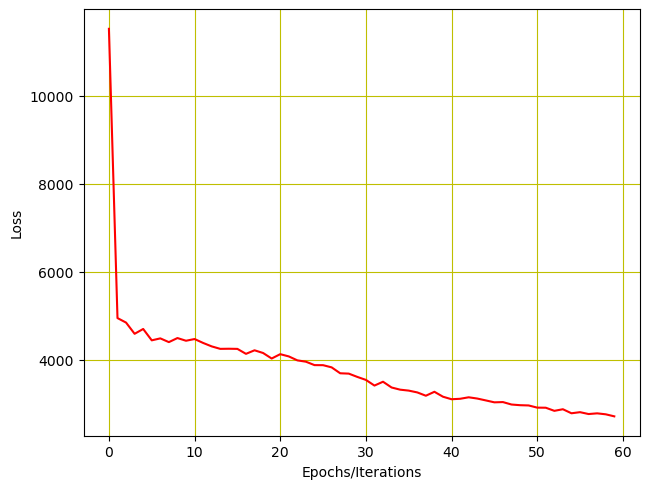

In [59]:
import matplotlib.pyplot as plt
plt.plot(loss_list, 'r')
plt.tight_layout()
plt.grid('True', color='y')
plt.xlabel("Epochs/Iterations")
plt.ylabel("Loss")
plt.show()

Save the model

In [60]:
PATH = './mymodelemb.pth'
torch.save(model.state_dict(), PATH)